Aykırı Gözlemleri Yakalamak

In [347]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [231]:
df_table= df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

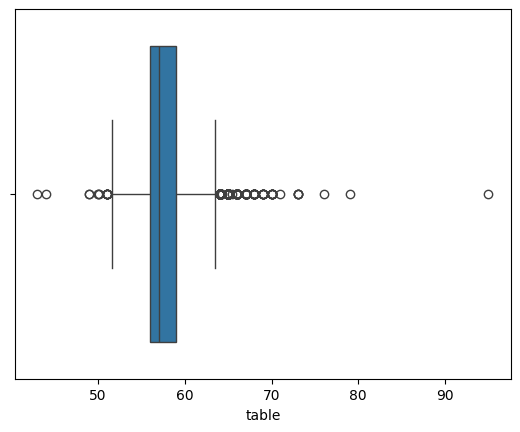

In [233]:
sns.boxplot(x=df.table)

In [235]:
Q1 = df_table.quantile(0.25) #Veri setinin ilk %25lik kısmı (küçükten büyüğe sıralanınca)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [237]:
Q1

56.0

In [239]:
Q3

59.0

In [241]:
IQR

3.0

boxplot işe eşik değerleri hesaplayalım

In [244]:
alt_sinir = Q1 - 1.5 *IQR
ust_sinir = Q3 + 1.5 *IQR

In [246]:
alt_sinir

51.5

In [248]:
ust_sinir

63.5

51.5 ile 63.5 arasında olmayan değerler AYKIRI DEĞERlerdir..

In [251]:
(df_table<alt_sinir) | (df_table>ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [253]:
aykiri_tf = (df_table<alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [255]:
df_table[aykiri_tf]  #aykırı gözlemler

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [257]:
df_table[aykiri_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

# #--------------------------------------------------------------------------------#


# Aykırı değer pobleminin çözümünü ele almak

### 1) Silmek

In [73]:
import pandas as pd
df_table= df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [83]:
type(df_table)

pandas.core.frame.DataFrame

In [136]:
df_table.shape

(53940,)

In [138]:
df_table = pd.DataFrame(df_table)

In [140]:
t_df = df_table[~((df_table<(alt_sinir)) | (df_table>(ust_sinir))).any(axis=1)]
t_df.shape

(53335, 1)

### 2) Ortalama İle Doldurmak
#### Aykırı değerler tablodaki bütün değerlerin ortalaması ile doldurulur.

In [345]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [145]:
df_table= df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [147]:
aykiri_tf.head() 

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [149]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [151]:
df_table.mean()

57.45718390804598

In [153]:
df_table[aykiri_tf].mean()

49.63125

In [162]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\iremb\AppData\Local\Temp\ipykernel_15868\1977116534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] =df_table.mean()


In [164]:
df_table[aykiri_tf]

1515     57.442462
3238     57.442462
3979     57.442462
4150     57.442462
5979     57.442462
7418     57.442462
8853     57.442462
11368    57.442462
22701    57.442462
25179    57.442462
26387    57.442462
33586    57.442462
35633    57.442462
45798    57.442462
46040    57.442462
47630    57.442462
Name: table, dtype: float64

### 3) Baskılamak  
#### Değerler üst sınıra yakınsa üst sınıra, alt sınıra yakınsa alt sınıra eşitlenir.

In [343]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [203]:
df_table= df["table"]
df_table.head()
df_table = pd.DataFrame(df_table)

In [205]:
alt_sinir

51.5

In [207]:
ust_sinir

63.5

In [269]:
aykiri_tf_alt = (df_table<alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [271]:
aykiri_tf_ust = (df_table>ust_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [279]:
df_table[aykiri_tf_alt] = alt_sinir
df_table[aykiri_tf_ust] = ust_sinir

C:\Users\iremb\AppData\Local\Temp\ipykernel_15868\2641098008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf_alt] = alt_sinir
C:\Users\iremb\AppData\Local\Temp\ipykernel_15868\2641098008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf_ust] = ust_sinir


<Axes: xlabel='table'>

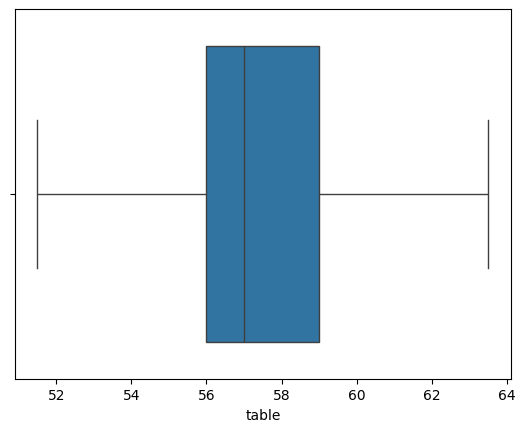

In [281]:
sns.boxplot(x=df_table)

In [283]:
df_table

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [287]:
df_table.min()

51.5

In [289]:
df_table.max()

63.5

## Çok Değişkenli Aykırı Gözlem Analizi

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [333]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [335]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [337]:
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor

In [339]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination= 0.1)  #komşu sayısı 20 yoğunluğu 0.1 olsun buna göre karşılaştırma yapılsın

In [341]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [349]:
df_scores = clf.negative_outlier_factor_

In [355]:
np.sort(df_scores)[0:10]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387])

In [357]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [359]:
esik_Deger = np.sort(df_scores)[13]  #rastgele bir değeri kendimize referans seçtik.

# Silme Yöntemi

In [361]:
aykiri_tf = df_scores>esik_Deger

In [363]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [365]:
yeni_df = df[df_scores>esik_Deger] # aykırı olmayan değerler

In [367]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [373]:
yeni_df_aykiri = df[df_scores<esik_Deger] # aykırı olan değerler
yeni_df_aykiri

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


# Baskılama Yöntemi

In [377]:
df[df_scores == esik_Deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [379]:
baski_degeri=df[df_scores == esik_Deger]

In [383]:
aykirilar = df[~aykiri_tf]

In [385]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [389]:
res = aykirilar.to_records(index = False)

In [393]:
res[:] = baski_degeri.to_records(index = False)

In [395]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [ ]:
df[~aykiri_tf]

##### aykiri_tf datası içerisinde değişiklik yok.
##### Arrayi gerçek verisetinin içine yerleştirmemiz gerekiyor

In [401]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res,index=df[~aykiri_tf].index)

In [403]:
import pandas as pd
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


# Eksik Veri Analizi

In [1]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [3]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [15]:
df.isnull().sum()  #her sütunda kaç boş değer var

V1    2
V2    3
V3    2
dtype: int64

In [17]:
df.notnull().sum() #her sütunda kaç dolu değer var

V1    7
V2    6
V3    7
dtype: int64

In [19]:
df.isnull().sum().sum() #veri setinde toplam kaç boş değer var

7

In [21]:
df.notnull().sum().sum() #veri setinde toplam kaç dolu değer var

20

In [23]:
df.isnull() #boş olanlara true 

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


df.isnull().any(axis=1) #satır olarak boş değer var mı? varsa true

In [33]:
df[df.isnull().any(axis=1)] #verisetinde boş değeri olan satırları getir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [39]:
df[df.notnull().all(axis=1)] ##verisetinde boş değeri olmayan satırları getir

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


###### diyelim ki all veya any  fonksiyonlarını bilmiyoruz.

In [54]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik değerin direkt silinmesi

In [60]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik değerin doldurulması

In [68]:
df.fillna(0)  #boş değerleri 0 ile doldur

,V1,V2,V3
0,1.0,7.0,0.0
1,3.0,0.0,12.0
2,6.0,5.0,5.0
3,0.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,0.0,7.0
6,0.0,0.0,0.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [78]:
df["V1"].fillna(df["V1"].mean())   #V1 sütununu v1 sütununun ortalaması ile doldur.

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

#### bütün sütünları kendi ortalaması ile doldurmak istersek

In [97]:
df.apply(lambda x : x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Eksik Verinin Görselleştirilmesi

In [100]:
!pip install missingno

In [102]:
import missingno as msno

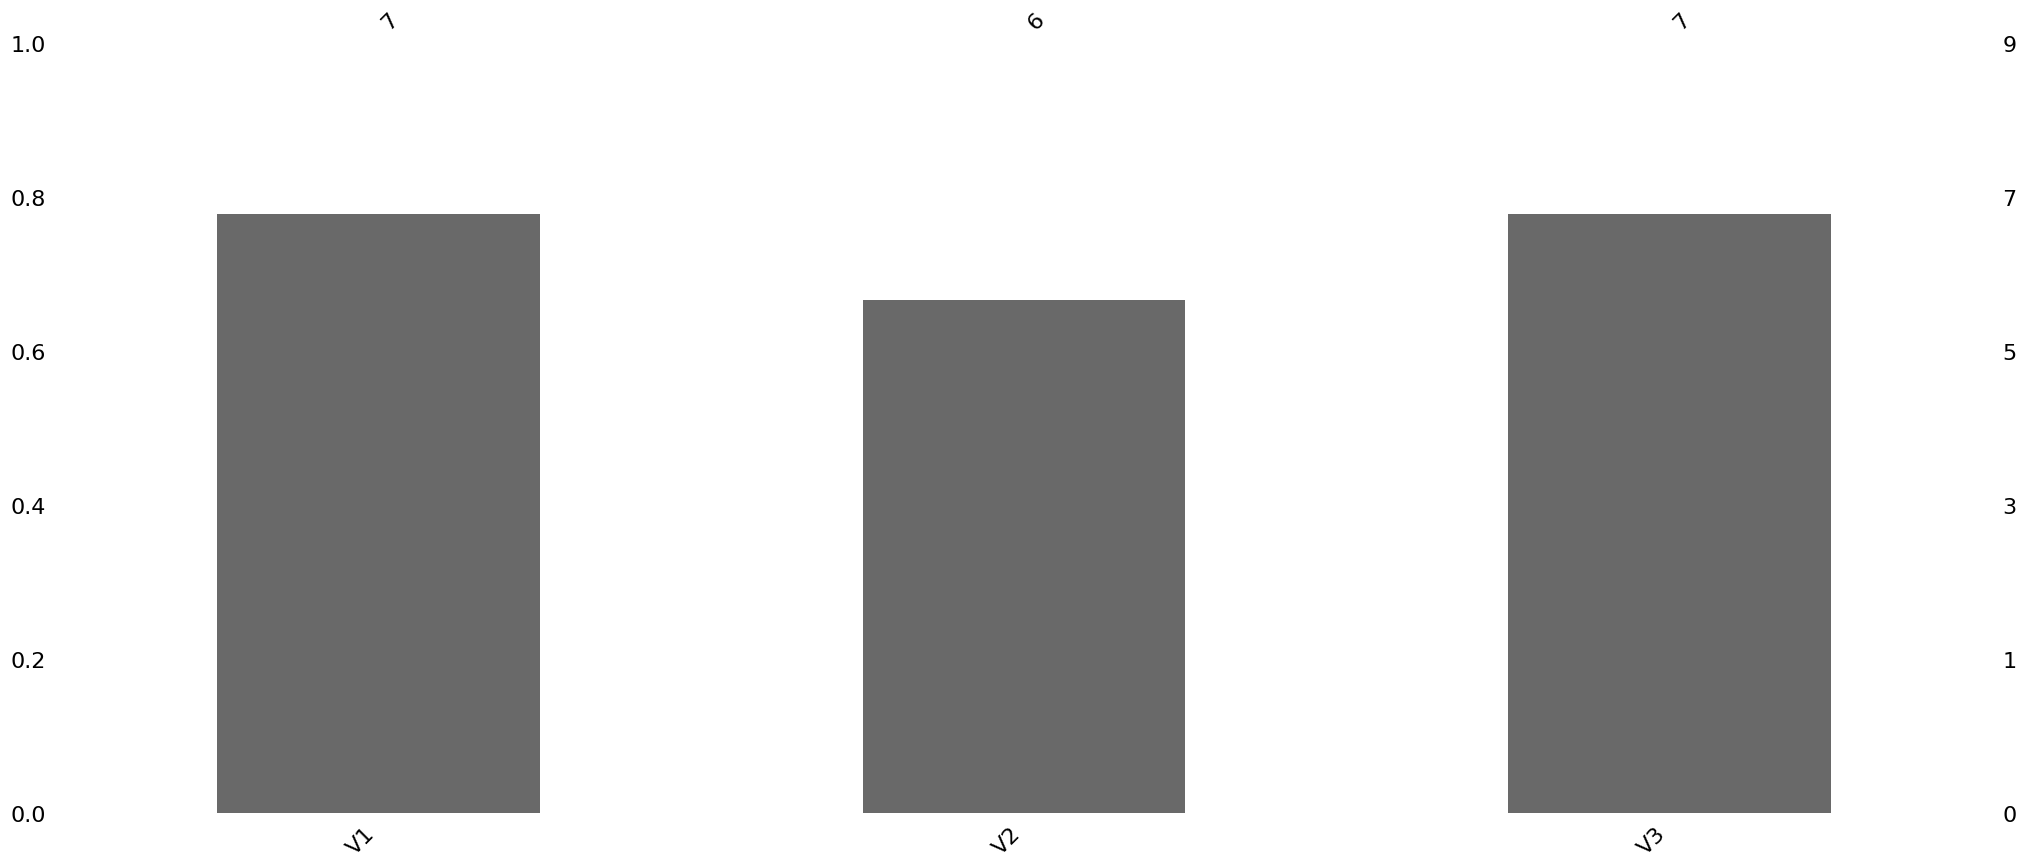

In [108]:
msno.bar(df); #dolu ve boşdeğerlerin görselleştirilmesi

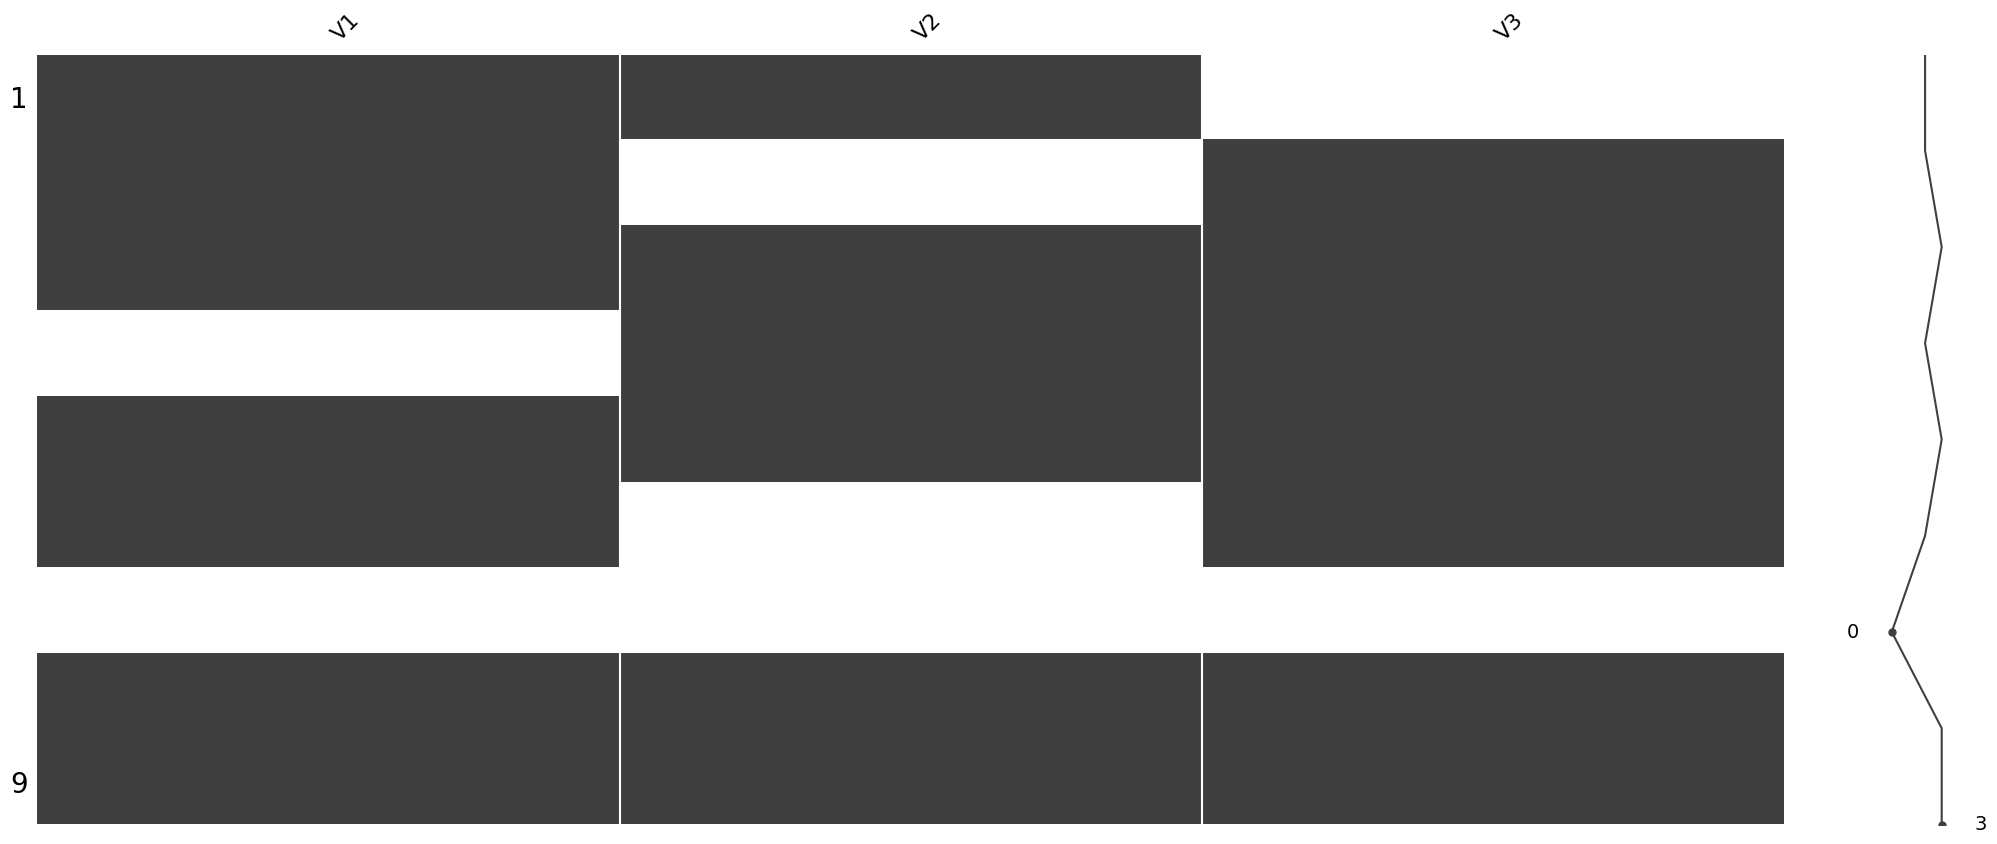

In [110]:
msno.matrix(df); #boş değerlerin birbiri ile ilişkisi var mı analiz

In [112]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [114]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

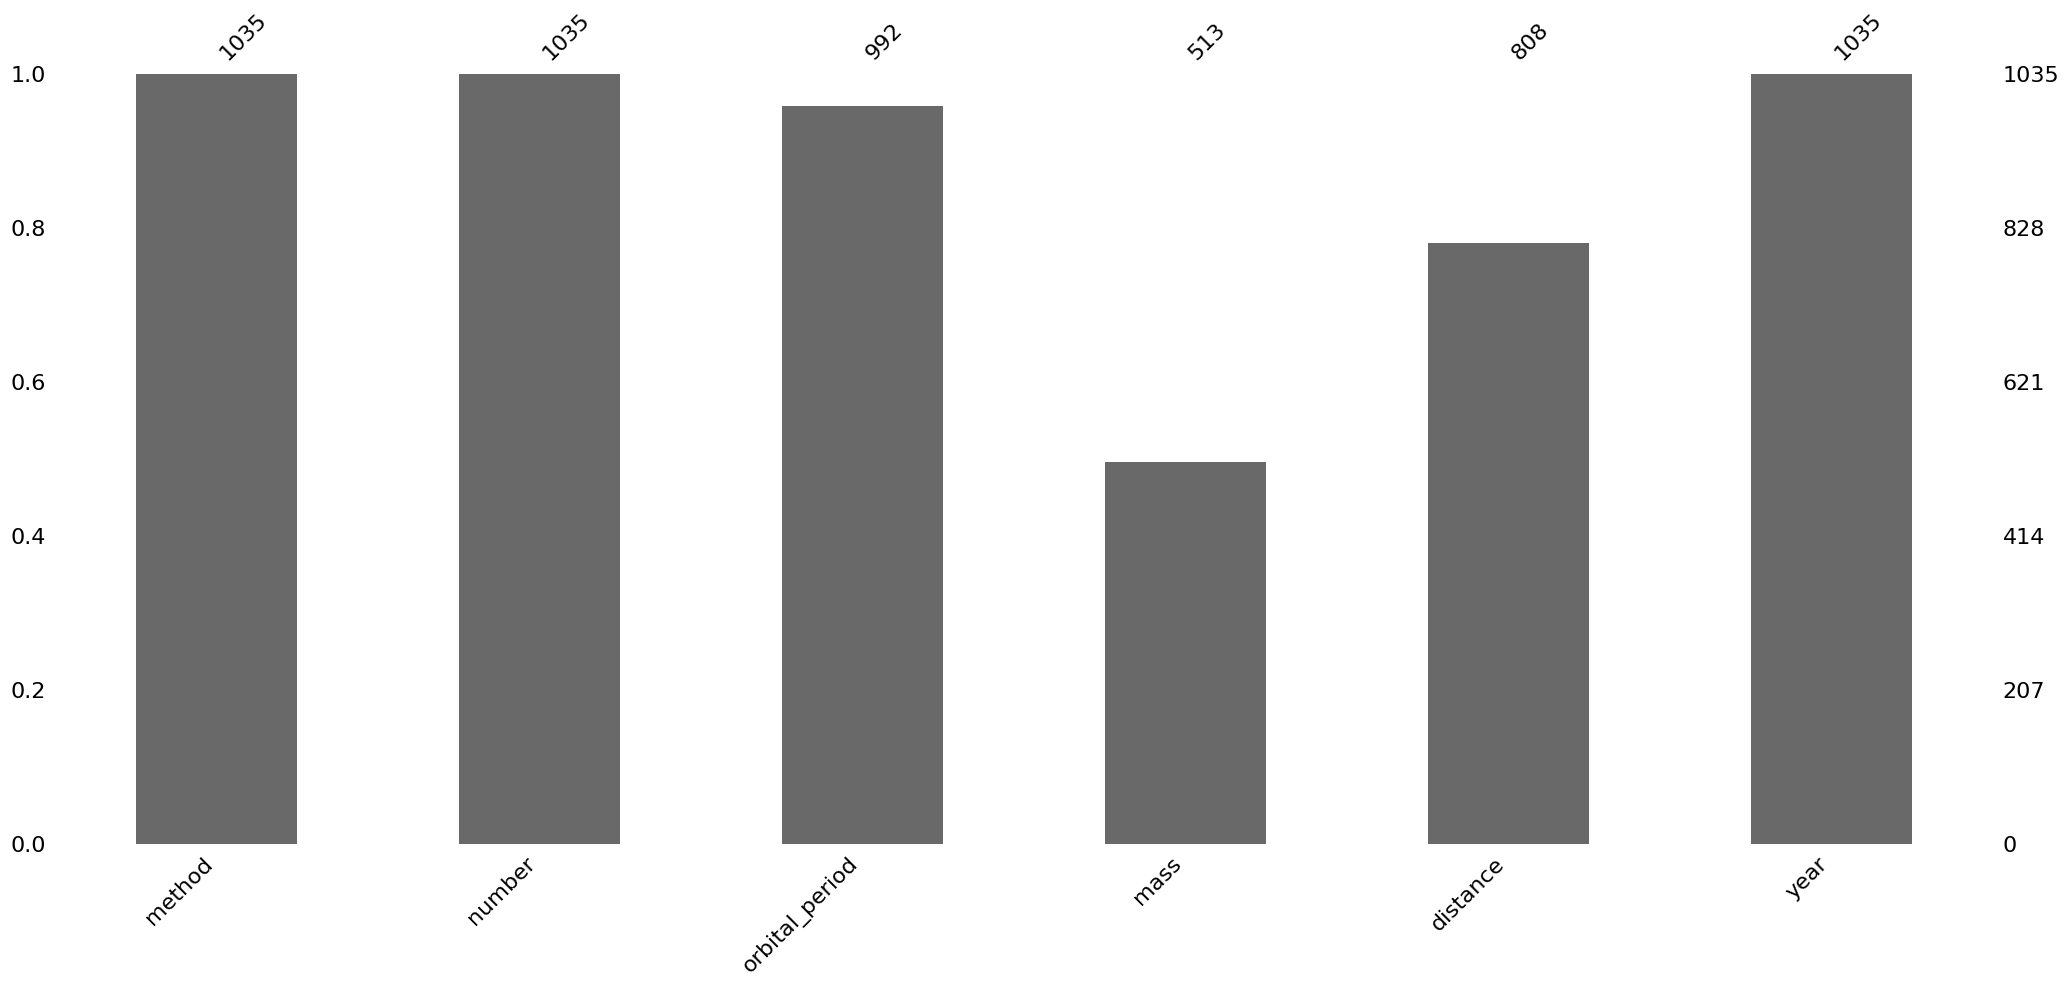

In [118]:
msno.bar(df);

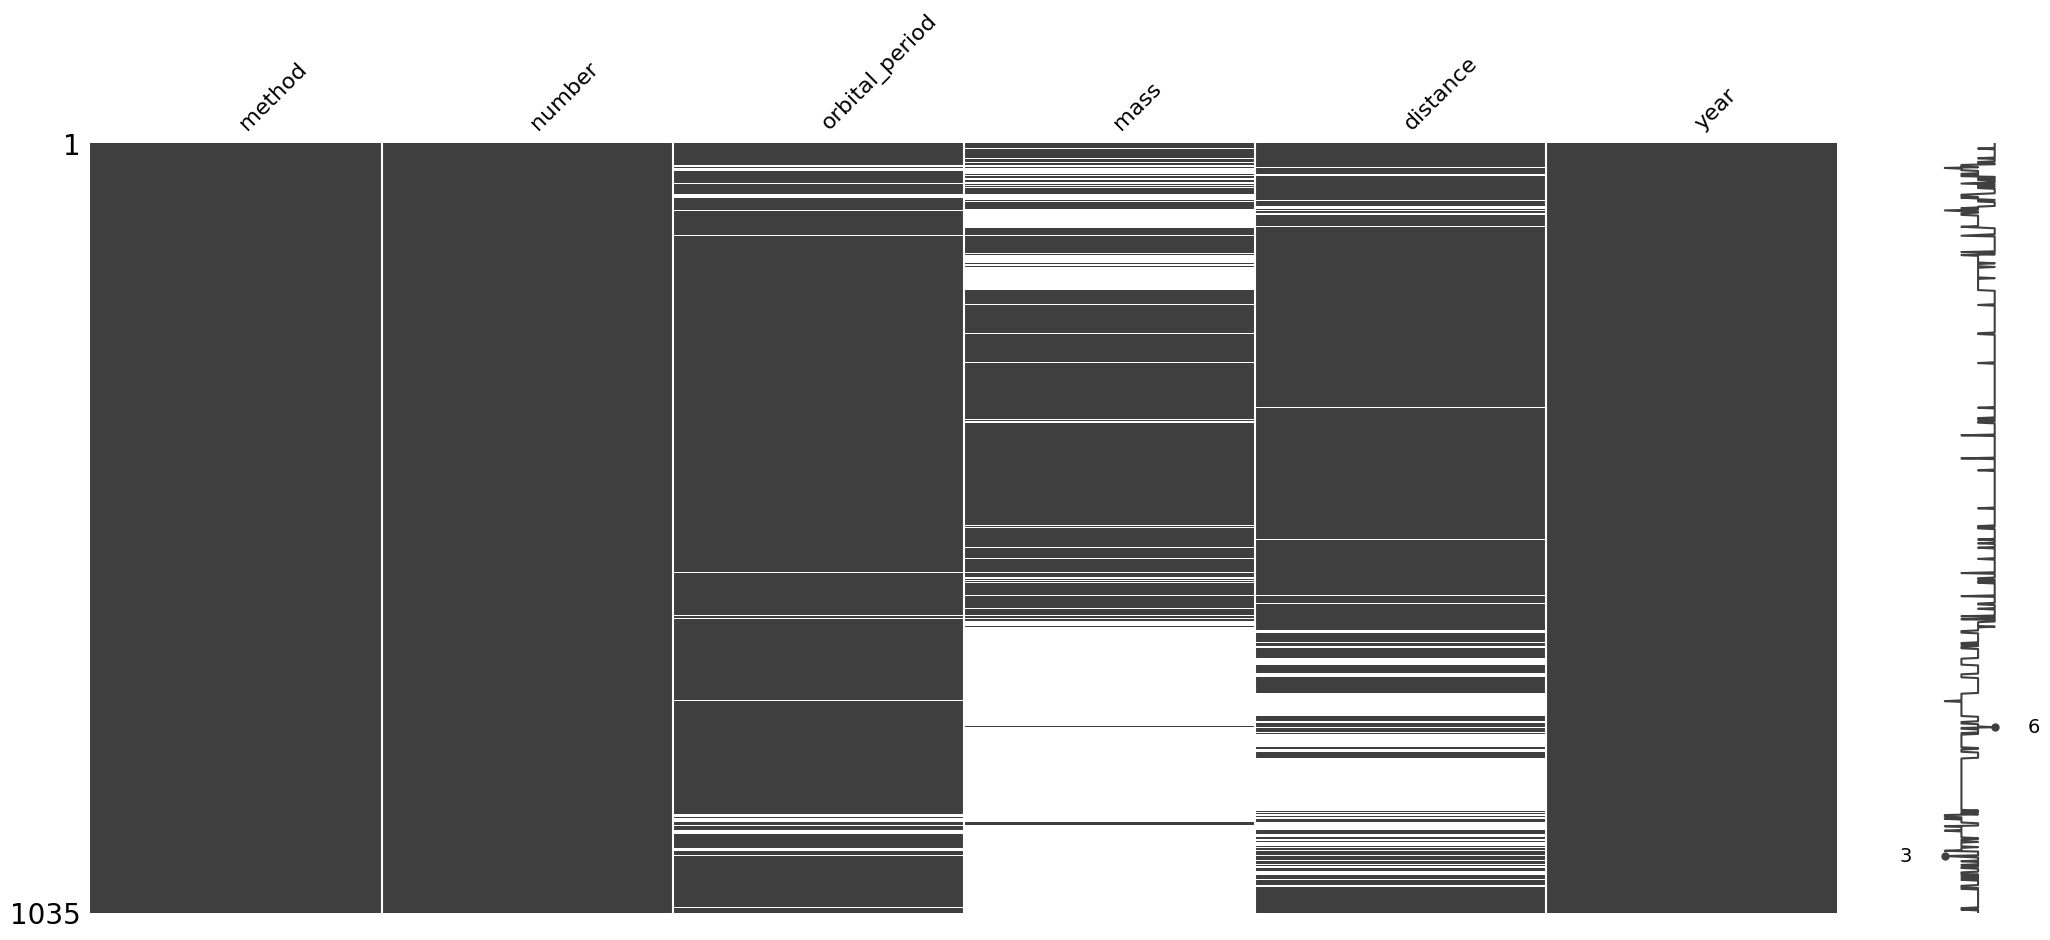

In [124]:
msno.matrix(df); #orbital period değişkenine bakıldığında her boş olduğu durumda mass değişkeninin de boş olduğu gözlemlenebilir. 
#Bu da ilişkileri var anlamına gelebilir 

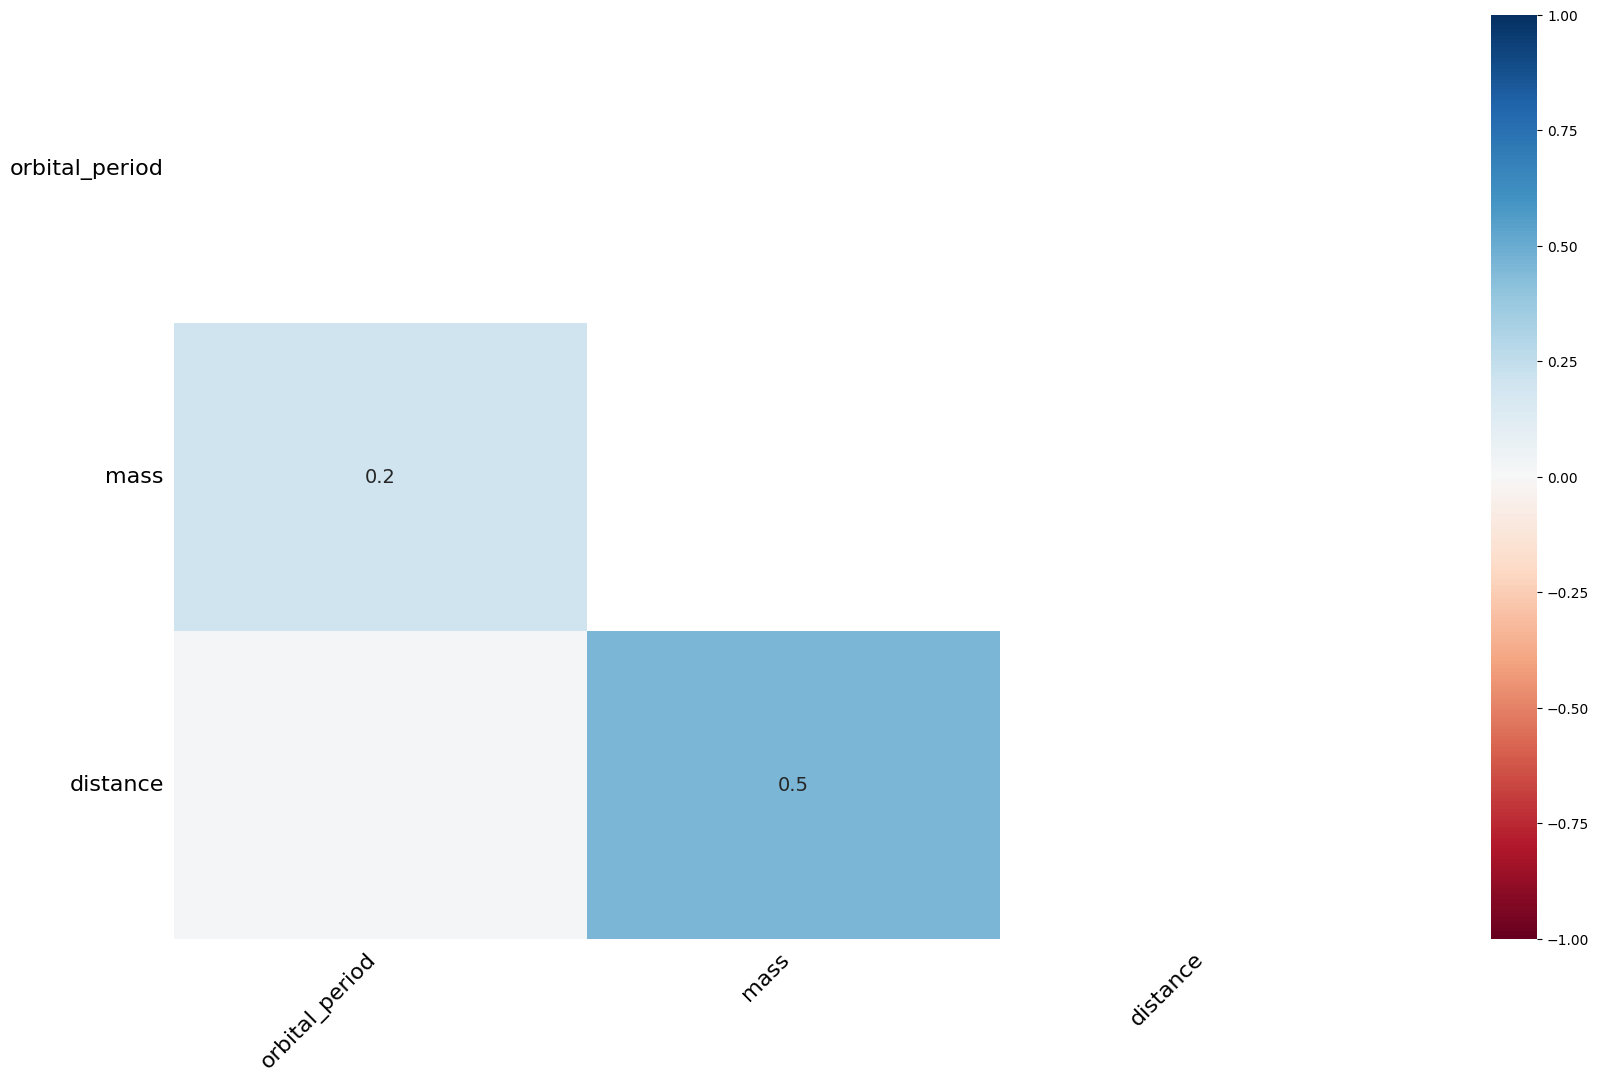

In [130]:
msno.heatmap(df);  #renk koyuluklarına göre birbiriyle ilişkisi var denilebilir.

In [132]:
df2 = sns.load_dataset("titanic")

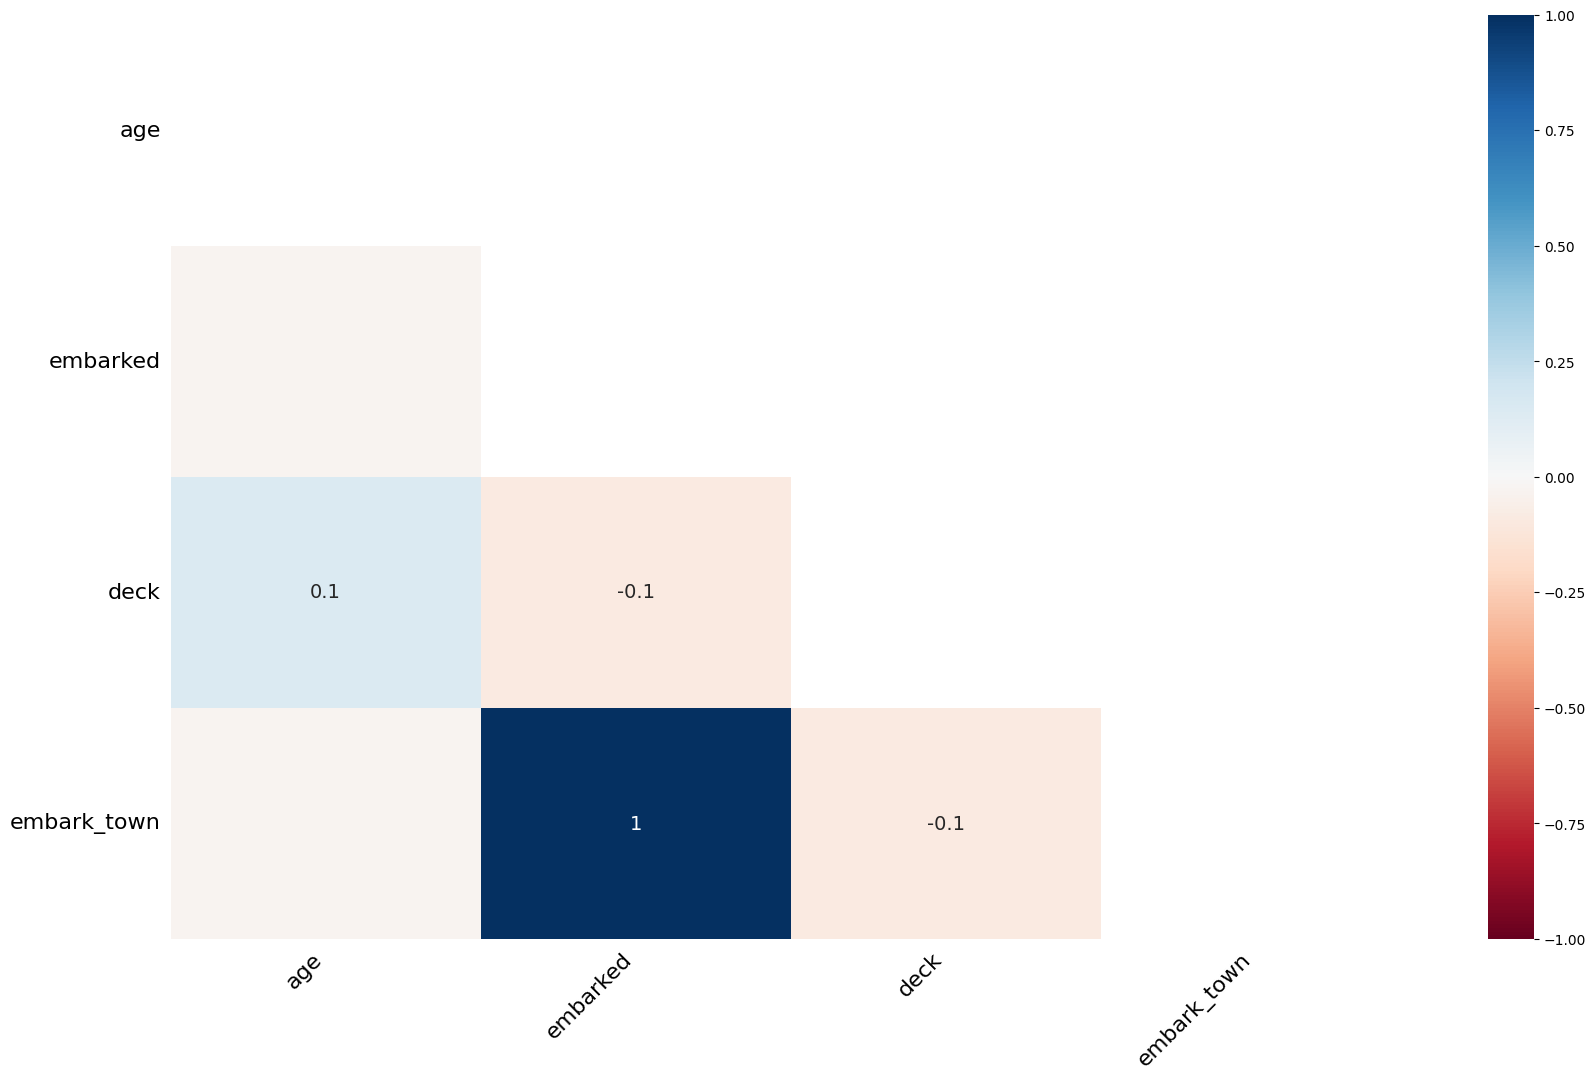

In [134]:
msno.heatmap(df2);

In [136]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

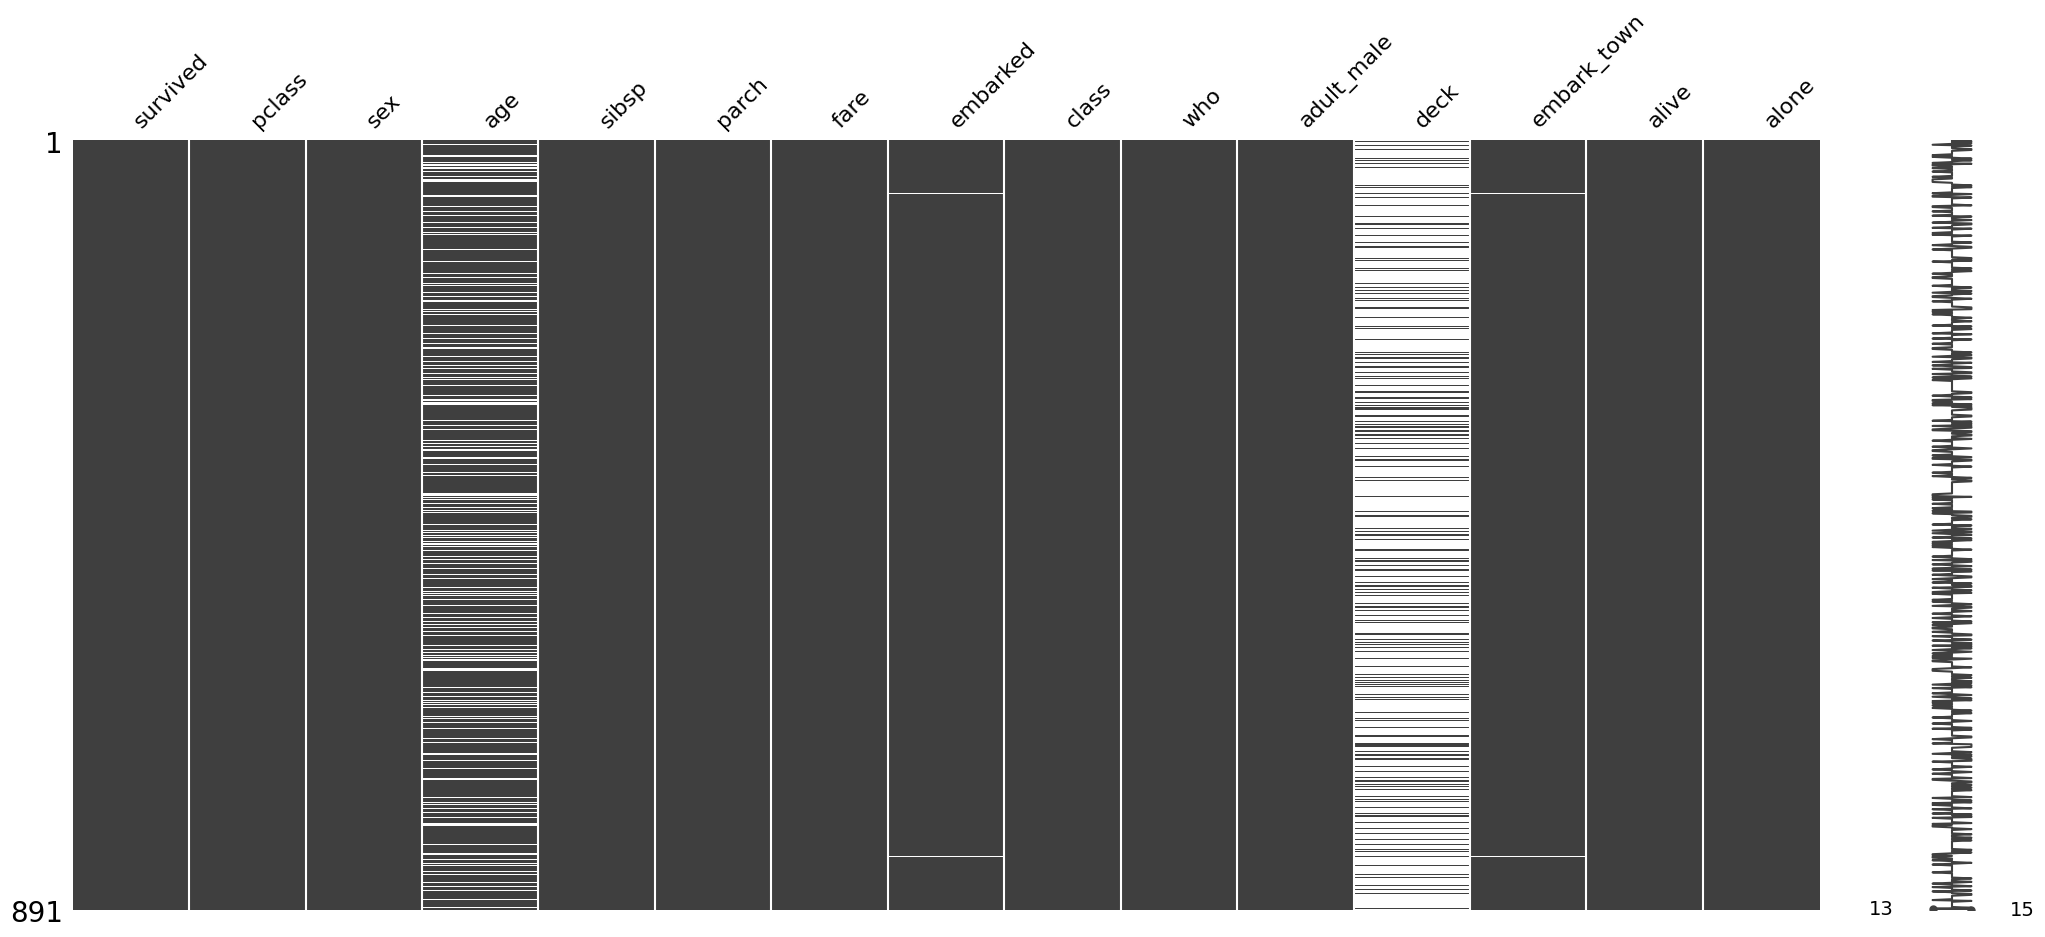

In [142]:
msno.matrix(df2)

### Silme Yöntemi

In [63]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df


,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [65]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [67]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [144]:
df2=df.copy()
df2["dolu_sütun"] = np.ones(df2.shape[0])#bir tane bile boş değeri varsa silme işleminin çalışıp çalışmadığına bakalım

In [92]:
df2

,V1,V2,V3,dolu_sütun
0,1.0,7.0,NaN,1.0
1,3.0,NaN,12.0,1.0
2,6.0,5.0,5.0,1.0
3,NaN,8.0,6.0,1.0
4,7.0,12.0,14.0,1.0
5,1.0,NaN,7.0,1.0
6,NaN,NaN,NaN,1.0
7,9.0,2.0,2.0,1.0
8,15.0,3.0,31.0,1.0


In [94]:
df2.dropna(axis = 1) #bir tane bile boş değeri varsa sütunu sil, dolu olan sütun kaldı.

,dolu_sütun
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0


In [96]:
#hepsi boş olan sütun ekleyelim
df2["bos_sutun"] = np.nan

In [146]:
df2.dropna(axis =1,how="all" ) # bütün satırları boş olan sütunları sil

,V1,V2,V3,dolu_sütun
0,1.0,7.0,NaN,1.0
1,3.0,NaN,12.0,1.0
2,6.0,5.0,5.0,1.0
3,NaN,8.0,6.0,1.0
4,7.0,12.0,14.0,1.0
5,1.0,NaN,7.0,1.0
6,NaN,NaN,NaN,1.0
7,9.0,2.0,2.0,1.0
8,15.0,3.0,31.0,1.0


In [148]:
df2 =df2.drop("dolu_sütun",axis =1) #dolu_sütun sütununu sil
df2

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [152]:
df2.dropna(how="all",axis=0)  #6.indexte bütün satır  0 olduğu için silindi.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [156]:
df2.dropna(how="all",axis=0,inplace=True)  #6.indexte bütün satır  0 olduğu için silindi. df2 içinde kalıcı olmasıiçin inplace kullanıldı.
df2

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Değer Atama Yöntemleri

In [159]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [165]:
df.fillna(df.mean()) #boş verileri bulunduğu sütunun ortalaması ile doldurur.

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [167]:
df.fillna(0) #boş değereri 0 ile doldurur.

,V1,V2,V3
0,1.0,7.0,0.0
1,3.0,0.0,12.0
2,6.0,5.0,5.0
3,0.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,0.0,7.0
6,0.0,0.0,0.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [169]:
df["V1"].fillna(df["V1"].median())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [173]:
#tüm değişkenler için birinci yol
df.apply(lambda x: x.fillna(x.mean()),axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [175]:
#ikinci yol
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [177]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [179]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [183]:
#ucuncu yol
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0
